In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2021-08-07 13:57:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   286MB/s    in 0.2s    

2021-08-07 13:57:18 (286 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
! unzip -q cats_and_dogs_filtered.zip

replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace cats_and_dogs_filtered/validation/dogs/dog.2127.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from keras.metrics import categorical_crossentropy
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy
from keras.optimizers import SGD, Adam
import numpy as np

In [ ]:
train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_dir,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=validation_dir, target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Reescribir la red utilizando el método funcional y definiendo una función de ayuda.

In [ ]:
## inputs = Input(shape=(224,224,3)), etc.
def create_block(n_filters, n_layers, inputs):
    '''
    Entradas:
     n_filters: numero de filtros del bloque
     n_layers: número de capas del bloque
     inputs: tensor de entrada
    Retorna:
     tensor de salida con las capas aplicadas
    '''
    # usar un bucle for para agregar n_layers capas convolucionales
    # luego, agregar la capa MaxPool2D y retornarla
    for i in range(n_layers):
      inputs = Conv2D(filters=n_filters, kernel_size=(3,3), padding="same", activation="relu")(inputs)
    inputs = MaxPool2D(pool_size=(2,2),strides=(2,2))(inputs)
    return inputs # retornar el tensor
    
# reemplazar los bloques usando la función create_block
inputs = Input(shape=(224,224,3))
x = create_block(64, 2, inputs)
x = create_block(128, 2, x)
x = create_block(256, 3, x)
x = create_block(512, 3, x)
x = create_block(512, 3, x)
x = Flatten()(x)
x = Dense(units=4096, activation="relu")(x)
x = Dense(units=4096, activation="relu")(x)
x = Dense(units=1, activation="softmax")(x)
model_func = Model(inputs, x)

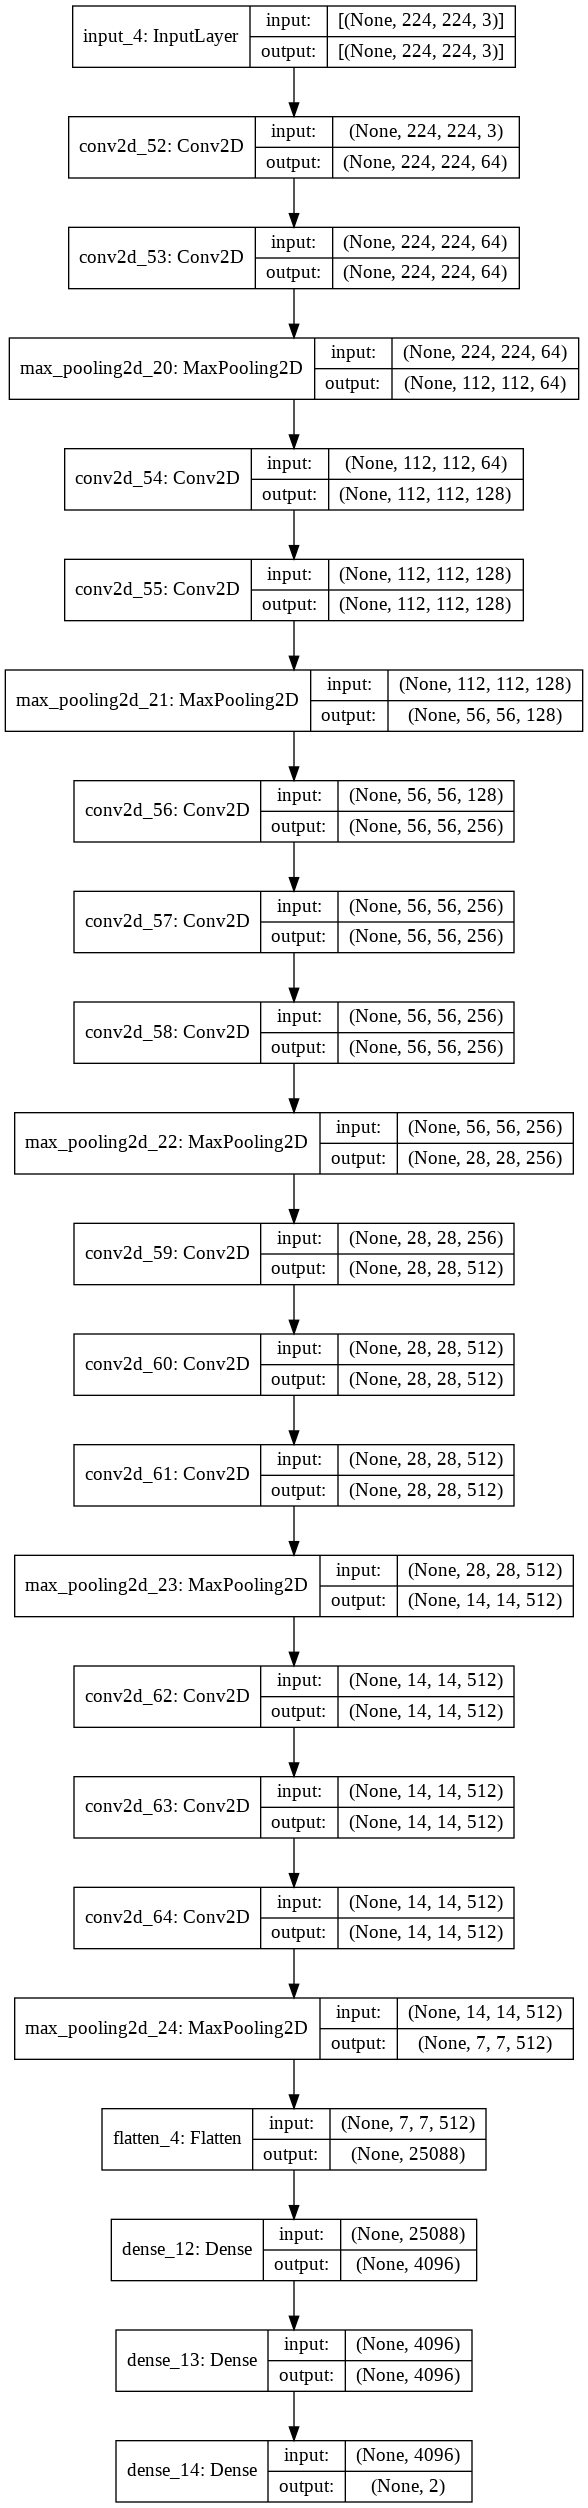

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_func, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax"))


opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 56, 56, 256)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

basePath = '/content/drive/MyDrive/CEIA/vcii/vcii/clase3/'
modelPath = basePath + 'vgg16_1.h5'

checkpoint = ModelCheckpoint(modelPath, monitor='val_accuracy', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', save_freq=1000)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto') # no deja que alcance una accurracy superior a 0.5


In [ ]:
hist = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 5s 545ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.6928 - val_accuracy: 0.5188
Epoch 2/10
10/10 [==============================] - 5s 534ms/step - loss: 0.6926 - accuracy: 0.5219 - val_loss: 0.6941 - val_accuracy: 0.4812
Epoch 3/10
10/10 [==============================] - 5s 514ms/step - loss: 0.6937 - accuracy: 0.4901 - val_loss: 0.6940 - val_accuracy: 0.4812
Epoch 4/10
10/10 [==============================] - 5s 536ms/step - loss: 0.6926 - accuracy: 0.5219 - val_loss: 0.6938 - val_accuracy: 0.4875
Epoch 5/10
10/10 [==============================] - 5s 515ms/step - loss: 0.6939 - accuracy: 0.4967 - val_loss: 0.6943 - val_accuracy: 0.4781
Epoch 6/10
10/10 [==============================] - 5s 543ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5625
Epoch 7/10
10/10 [==============================] - 5s 548ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6935 - val_accuracy: 0.4719
Epoch 

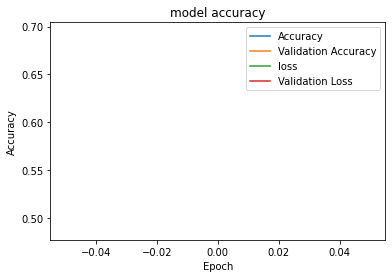

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

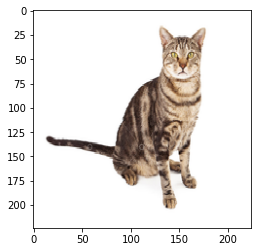

In [ ]:
from tensorflow.keras.preprocessing import image

# bajar una imagen de ejemplo de internet

imagePath = basePath + 'ejemplo.png'
img = image.load_img(imagePath, target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [ ]:
output = model.predict(img)

if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

cat
